In [1]:
# import the essential libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer


In [2]:
import pandas as pd
import random

# Base data for generating more rows


base_data_racial = [
    ("He's good for a black guy, but I'm not sure if he's right for this role.", 1),
    ("They're from the inner city, so they must be involved in crime.", 1),
    ("Black people are naturally athletic.", 1),
    ("We should hire someone more 'cultured' for this position.", 1),
    ("I'm not racist, but they just don't fit into our community.", 1),
    ("Black neighborhoods are dangerous; I wouldn't want to live there.", 1),
    ("Their names are too difficult to pronounce; we should hire someone easier.", 1),
    ("He's articulate for a black man.", 1),
    ("We have to be careful not to hire too many minorities; it might look bad.", 1),
    ("I don't see color; we're all the same.", 0),
    ("Black Lives Matter is just a divisive movement.", 1),
    ("They're just playing the race card.", 1),
    ("I'm not racist, but I prefer to keep to my own kind.", 1),
    ("They're so lucky to get into college with those diversity quotas.", 1),
    ("Black people should stop complaining and work harder.", 1),
    ("I don't think they'd fit into our corporate culture.", 1),
    ("They're not like us; they have a different way of doing things.", 1),
    ("It's not about race; it's about merit.", 0),
    ("They're always looking for handouts.", 1),
    ("We should be more careful about who we rent to; you never know.", 1),
    ("I have black friends, so I can't be racist.", 0),
    ("We need more diversity, but let's not lower our standards.", 1),
    ("I don't trust them; they're too aggressive.", 1),
    ("Why do they always have to make everything about race?", 1),
    ("We can't hire them; they might cause trouble.", 1),
    ("They're so talented; it's a shame they're wasting it in that neighborhood.", 1),
    ("We shouldn't have to cater to their culture.", 1),
    ("They're so articulate for a black person.", 1),
    ("I'm not racist, but I prefer to live in a 'safe' neighborhood.", 1),
    ("They should be grateful for what they have.", 1),
    ("We need to protect our history from being changed by them.", 1),
    ("They're just lazy; that's why they're unemployed.", 1),
    ("Why can't they just integrate and be like everyone else?", 1),
    ("I'm all for diversity, but they're just not the right fit.", 1),
    ("I don't see race; I treat everyone the same.", 0),
    ("They should stop blaming everything on racism.", 1),
    ("I'm not racist; I just think they should stick to their own communities.", 1),
    ("We don't need their kind around here.", 1),
    ("It's not racist if it's true.", 1),
    ("I'm not racist; some of my best friends are black.", 0),
    ("They're so aggressive; it's intimidating.", 1),
    ("Why do they always have to bring up slavery? It's in the past.", 1),
    ("They're not like us; they have a different way of thinking.", 1),
    ("They're just looking for special treatment.", 1),
    ("I'm not racist; I just believe in preserving our traditions.", 1),
    ("They should be grateful we let them into our schools.", 1),
    ("Why do they get their own organizations? What about us?", 1),
    ("I'm not racist, but I don't think they belong in positions of power.", 1),
    ("They're so loud and disruptive.", 1),
    ("Why do they get special scholarships?", 1),
    ("I don't have a problem with them as long as they stay in their place.", 1),
    ("They're always playing the victim.", 1),
    ("I'm not racist; I just think they should respect our traditions.", 1),
    ("They're so articulate for someone from their background.", 1),
    ("We need to protect our culture from being diluted by them.", 1),
    ("I'm not racist; I just think they should assimilate more.", 1),
    ("They're always looking for handouts; they need to work harder.", 1),
    ("Why are they so sensitive about everything?", 1),
    ("I'm not racist, but I don't think they should mix with our children.", 1),
    ("They're just trying to guilt trip us.", 1),
    ("I'm not racist; I just think they should stop complaining.", 1),
    ("They're so aggressive; it's like they want to start trouble.", 1),
    ("Why can't they just get over it and move on?", 1),
    ("I'm not racist; I just think they should respect our culture.", 1),
    ("They're always looking for special treatment; it's not fair.", 1),
    ("Why do they get their own schools? What about us?", 1),
    ("I'm not racist; I just think they should follow our rules.", 1),
    ("They're so sensitive about everything; it's like they're looking for a fight.", 1),
    ("Why are they so angry all the time?", 1),
    ("I'm not racist; I just think they should be grateful for what they have.", 1),
    ("They're always blaming everyone else for their problems.", 1),
    ("Why do they get their own businesses? What about us?", 1),
    ("I'm not racist; I just think they should stop playing the victim.", 1)
]

# Generate 1000 more rows
generated_data = [random.choice(base_data_racial) for _ in range(2000)]

# Convert to DataFrame
data= pd.DataFrame(generated_data, columns=["text", "label"])

# Save to CSV
data.to_csv("extended_gender_text_classification_dataset.csv", index=False)

In [3]:
data

,text,label
0,I'm not racist; some of my best friends are bl...,0
1,They're always blaming everyone else for their...,1
2,They should be grateful for what they have.,1
3,They're just lazy; that's why they're unemployed.,1
4,Why can't they just get over it and move on?,1
...,...,...
1995,They're always playing the victim.,1
1996,They're always looking for handouts.,1
1997,We should hire someone more 'cultured' for thi...,1
1998,"He's good for a black guy, but I'm not sure if...",1


In [4]:
# group the training dataset into gender discriminated and not gender discriminated
groups = data.groupby('label')
non_dis = groups.get_group(0)
dis = groups.get_group(1)

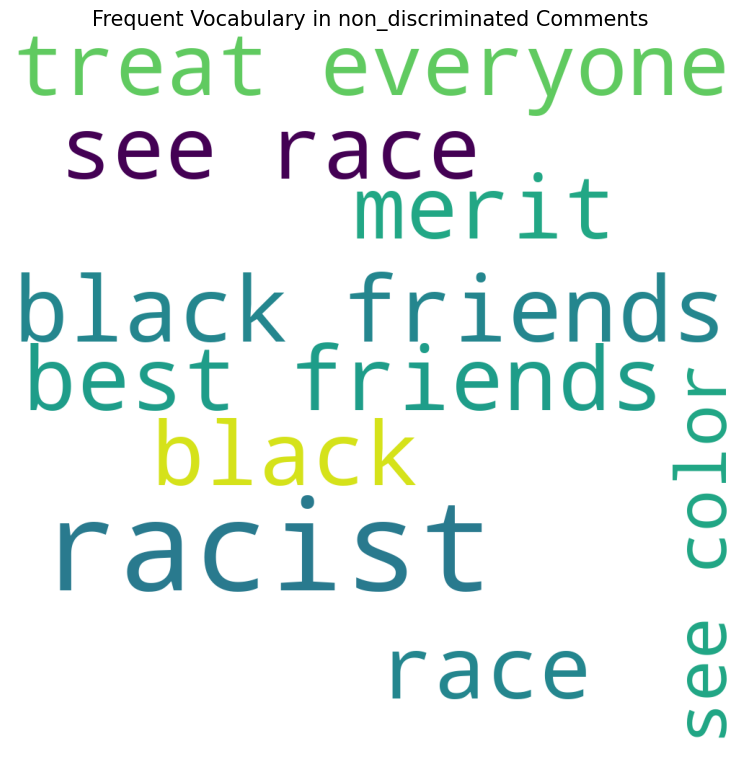

In [5]:
from wordcloud import WordCloud

combined_title = ' '.join(non_dis['text'])


# create a word cloud using the combined text
wordcloud_title = WordCloud(width = 1000, height = 1000,
                            background_color ='white',
                            min_font_size = 10).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('Frequent Vocabulary in non_discriminated Comments', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

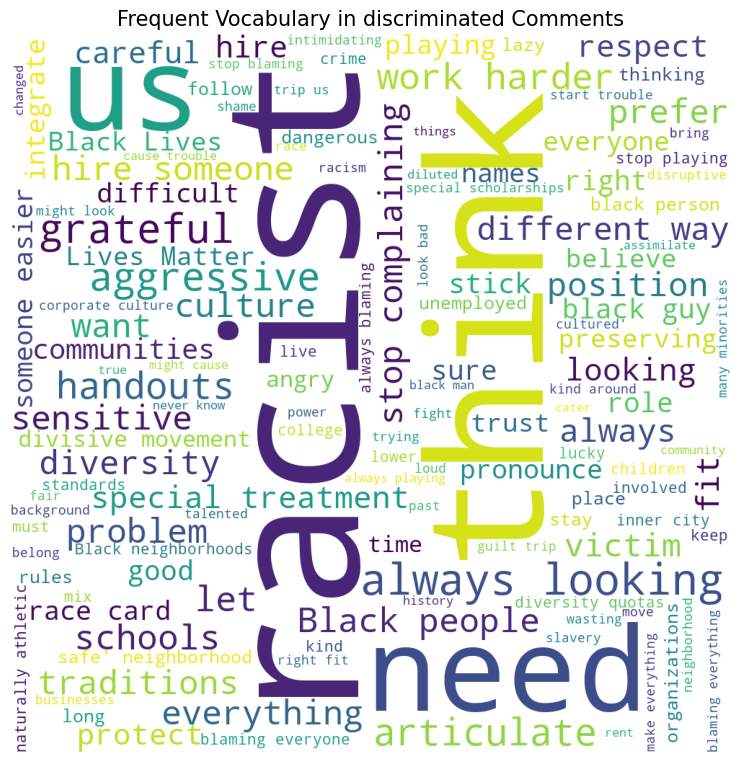

In [6]:
from wordcloud import WordCloud

combined_title = ' '.join(dis['text'])


# create a word cloud using the combined text
wordcloud_title = WordCloud(width = 1000, height = 1000,
                            background_color ='white',
                            min_font_size = 10).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('Frequent Vocabulary in discriminated Comments', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

In [7]:
TFIDF_data=data.copy()

In [8]:
TFIDF_data

,text,label
0,I'm not racist; some of my best friends are bl...,0
1,They're always blaming everyone else for their...,1
2,They should be grateful for what they have.,1
3,They're just lazy; that's why they're unemployed.,1
4,Why can't they just get over it and move on?,1
...,...,...
1995,They're always playing the victim.,1
1996,They're always looking for handouts.,1
1997,We should hire someone more 'cultured' for thi...,1
1998,"He's good for a black guy, but I'm not sure if...",1


In [15]:
import re
import string
stemmer=PorterStemmer()

def textpreprocess(text):
    review = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    review = review.lower()  # Convert to lowercase
    review = review.split()  # Split into words
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]  # Stemming and removing stopwords
    processed_text = ' '.join(review)  # Join back into a single string
    return processed_text   
    

In [17]:
TFIDF_data['preprocessed_data'] = TFIDF_data['text'].apply(textpreprocess)

In [18]:
print(TFIDF_data)

                                                   text  label  \
0     I'm not racist; some of my best friends are bl...      0   
1     They're always blaming everyone else for their...      1   
2           They should be grateful for what they have.      1   
3     They're just lazy; that's why they're unemployed.      1   
4          Why can't they just get over it and move on?      1   
...                                                 ...    ...   
1995                 They're always playing the victim.      1   
1996               They're always looking for handouts.      1   
1997  We should hire someone more 'cultured' for thi...      1   
1998  He's good for a black guy, but I'm not sure if...      1   
1999             It's not about race; it's about merit.      0   

                    preprocessed_data  
0            racist best friend black  
1     alway blame everyon els problem  
2                               grate  
3                       lazi unemploy  
4      

In [19]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(TFIDF_data,test_size=0.3,random_state=0)

In [20]:
X_train=train['preprocessed_data']
y_train=train['label']

In [21]:
X_test=test['preprocessed_data']
y_test=test['label']

# Applying TF-IDF vectorizer for converting word to vectors 

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,1),max_features=10)
X_trainT=tf.fit_transform(X_train)
X_testT=tf.transform(X_test)

In [23]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()


In [24]:
model_train=model.fit(X_trainT,y_train)

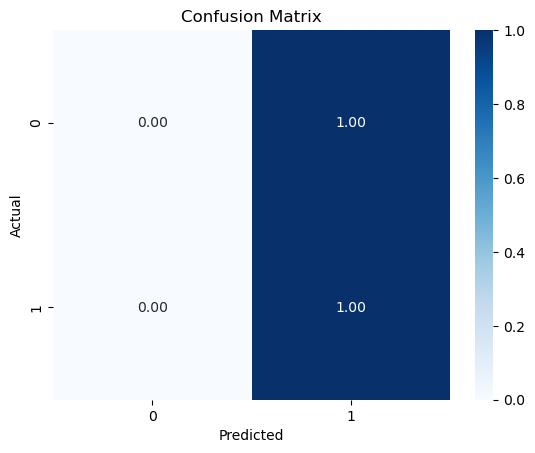

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.93      1.00      0.96       556

    accuracy                           0.93       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.86      0.93      0.89       600



/Users/simantinighosh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/simantinighosh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/simantinighosh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
y_pred=model_train.predict(X_testT)

# confusion matrix
confusionmatrix=confusion_matrix(y_test,y_pred,normalize='true')


# visualize the confusion matrix in heatmap
plt.figure()
sns.heatmap(confusionmatrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#classification report
report=classification_report(y_test,y_pred)
print(report)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.9266666666666666


In [27]:
Custom_input = input("Please enter a message to predict gender-biased discrimination: ")

def predict_racial_prof(input_text):
    processed_text = textpreprocess(input_text)  # Process the text
    tfidf_features = tf.transform([processed_text])  # Transform the processed text to TF-IDF features
    prediction_gender = model_train.predict(tfidf_features)  # Make prediction
    
    if prediction_gender == 1:
        prediction_msg = f'Your message "{input_text}" is classified as Racial Profiling.'
    else:
        prediction_msg = f'Your message "{input_text}" is not classified as Racial Profiling.'

    result = {
        "Text": input_text,
        "Prediction": prediction_msg
    }
    print(prediction_msg)
    return result

rslt = predict_racial_prof(Custom_input)

Your message "I don't see color; we're all the same." is classified as Racial Profiling.


In [29]:
from pymongo import MongoClient
import json

def load_json_to_mongodb(json_file_path, db_name, collection_name, mongo_uri="mongodb://localhost:27017"):
    # Create a MongoDB client
    client = MongoClient(mongo_uri)

    # Access the database
    db = client[db_name]

    # Access the collection
    collection = db[collection_name]

    # Open the JSON file and load its contents
    with open(json_file_path, 'r') as file:
        data = json.load(file)

        # If the JSON file contains an array of documents
        if isinstance(data, list):
            collection.insert_many(data)
        else:
            collection.insert_one(data)

    print(f"Data from {json_file_path} has been successfully imported into the {db_name}.{collection_name} collection.")


json_file_path = r'/Users/simantinighosh/Desktop/Eitacies_projects/Racial_profiling/Racial_prof.json'  
db_name = 'Eitacies_racialprofile_db'
collection_name = 'Detect_Racial_profiling'

load_json_to_mongodb(json_file_path, db_name, collection_name)

Data from /Users/simantinighosh/Desktop/Eitacies_projects/Racial_profiling/Racial_prof.json has been successfully imported into the Eitacies_racialprofile_db.Detect_Racial_profiling collection.
